https://www.geeksforgeeks.org/dbms/

https://www.datacamp.com/tutorial/normalization-in-sql

http://geeksforgeeks.org/introduction-of-database-normalization/

# What is Normalization in SQL?

Database normalization is an important process used to organize and structure relational databases to:
* Reduce redundancy (having the same data but at different places),
* Simplify querying, and
* Improve data consistency.

It involves breaking large tables into smaller, related tables while maintaining data relationships & integrity.

Data redundancy unnecessarily increases the size of the database as the same data is repeated in many places. Inconsistency problems also arise during insert, delete, and update operations. 

> **Note**: By applying normalization, we break a large table into smaller tables based on **functional dependencies**.

Let’s take a brief look at some scenarios where normalization is often used.

**Data integrity**
* Imagine a database that contains customer information.
* Without normalization, if a customer changes their age, we would need to update it in multiple places, which would increase the risk of inconsistencies.
* By normalizing the data, we can have separate tables linked by a unique identifier that will ensure that the data remains accurate and consistent.

**Efficiency querying**
* Let’s consider a complex database with multiple related tables that store redundant information.
* In this scenario, queries involving joins become more complicated and resource-intensive.
* Normalization will help simplify querying by breaking down data into smaller tables, with each table containing only relevant information, thereby reducing the need for complex joins.

**Storage optimization**
* A major problem with redundant data is that it occupies unnecessary storage space.
* For instance, if we store the same product details in every order record, it leads to duplication.
* With normalization, you can eliminate redundancy by splitting data into separate tables.

# Why is Normalization in SQL Important?

Normalization plays a crucial role in database design. 

Here are several reasons why it’s essential:
* **Reduces redundancy**: Redundancy is when the same information is stored multiple times, and a good way of avoiding this is by splitting data into smaller tables.
* **Improves query performance**: You can perform faster query execution on smaller tables that have undergone normalization.
* **Minimizes update anomalies**: With normalized tables, you can easily update data without affecting other records.
* **Enhances data integrity**: It ensures that data remains consistent and accurate.

# What is the Need for Normalization?

If a table is not properly normalized and has data redundancy, it will not only take up extra data storage space but also make it difficult to handle and update the database.

There are several factors that drive the need for normalization, from data redundancy(as covered above) to difficulty managing relationships. Let’s get right into it:

* **Insertion, deletion, and update anomalies**: Any form of change in a table can lead to errors or inconsistencies in other tables if not handled carefully. These changes can either be adding new data to a database, updating the data, or deleting records, which can lead to unintended loss of data.
* **Difficulty in managing relationships**: It becomes more challenging to maintain complex relationships in an unnormalized structure.
* Other factors that drive the need for normalization are **partial dependencies and transitive dependencies**, in which partial dependencies can lead to data redundancy and update anomalies, and transitive dependencies can lead to data anomalies. We will be looking at how these dependencies can be dealt with to ensure database normalization in the coming sections.

# Different Types of Database Normalization

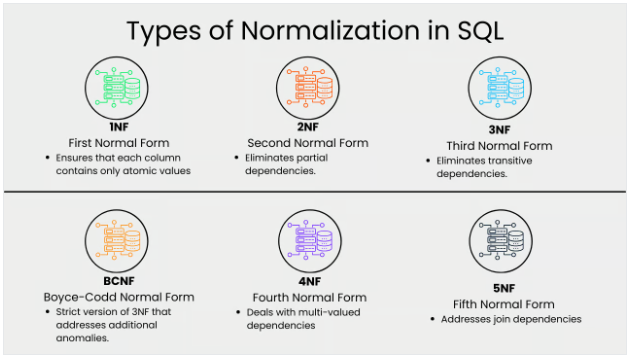

**First Normal Form (1NF)**

* This normalization level ensures that each column in your data contains only atomic values.
* Atomic values in this context mean that each entry in a column is indivisible. 
* `1NF` ensures atomicity of data, with each column cell containing only a single value and each column having unique names.

**Second Normal Form (2NF)**

Eliminates partial dependencies by ensuring that non-key attributes depend only on the primary key. What this means, in essence, is that there should be a direct relationship between each column and the primary key, and not between other columns.

**Third Normal Form (3NF)**

Removes transitive dependencies by ensuring that non-key attributes depend only on the primary key. This level of normalization builds on 2NF.

**Boyce-Codd Normal Form (BCNF)**

This is a more strict version of 3NF that addresses additional anomalies. At this normalization level, every determinant is a candidate key.

**Fourth Normal Form (4NF)**

This is a normalization level that builds on BCNF by dealing with multi-valued dependencies.

**Fifth Normal Form (5NF)**

5NF is the highest normalization level that addresses join dependencies. It is used in specific scenarios to further minimize redundancy by breaking a table into smaller tables.

# Database Normalization With Real-World Examples

Now that we understand why normalization is necessary, let’s take an example of a Library database to maintain books & borrowers to explore the concept of normalization:

Imagine a library database with a table storing book information (title, author, genre, and borrowed_by).

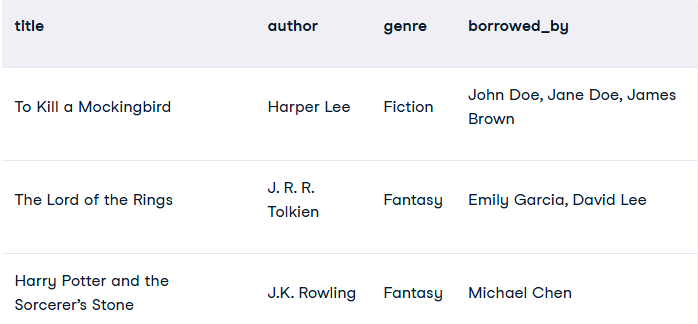

## First Normal Form (1NF)

**1NF ensures that each column cell contains only atomic values.** If the table is not normalized, `borrowed_by` could contain a list of borrower names separated by commas. This violates **1NF**, as a single cell holds multiple values.
* One way to achieve the First Normal Form is to split rows into separate entries, ensuring each piece of data is placed in a single cell.

    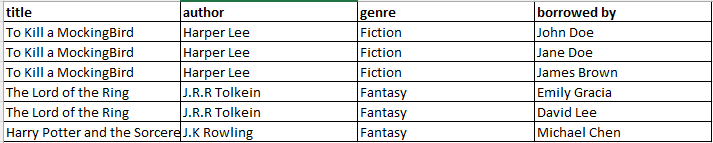

* Instead of repeating the same data multiple times, we should **store each piece of information only once** and **link them**. (`as shown in the solution`)
* This is exactly where **functional dependency** comes in.

A **functional dependency** exists when knowing the value of one column tells us the value of another column. 
* This means that if you know the value of one column, you can automatically determine the value of another column.
* This helps us reduce redundancy, maintain data consistency, and improve efficiency.
* Without it, databases can become inconsistent, difficult to update, and error-prone.

Here, **title** tells about the **book**, **author**, and **genre**. So we should create a separate table called Book and store this info, and use a reference to it.

**Without functional dependencies, databases store redundant data, making updates and searches inefficient.**


**Solution**
* In 1NF, we create a separate table for borrowers and link them to the book table.
* These tables can either be linked using the **foreign key** in the borrower table or **a separate linking table**.
* The foreign key in the borrowers table approach involves adding a foreign key column to the borrowers table that references the primary key of the books table.
* This will enforce a relationship between the tables, ensuring data consistency.

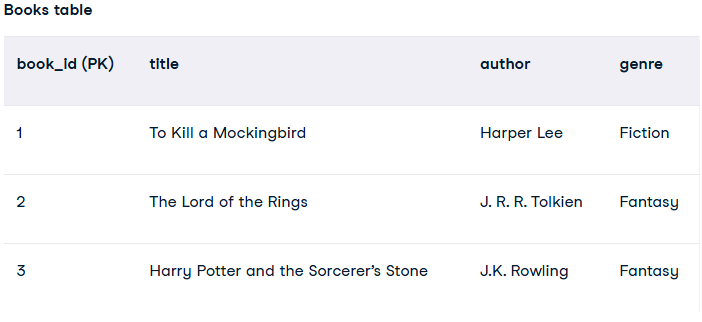

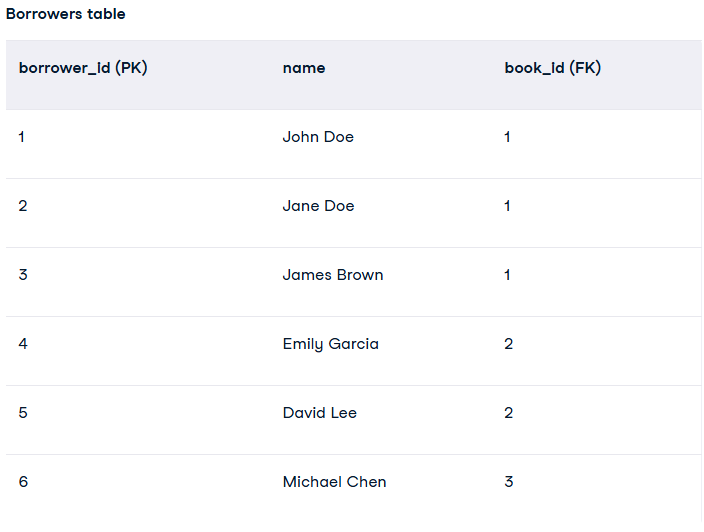


## Second Normal Form (2NF)

Builds upon 1NF by ensuring there are no partial dependencies on the primary key. In simpler terms, all non-key attributes must depend on the entire primary key and not just part of it.

From the 1NF that was implemented, we already have two separate tables.

Now, let’s say we want to link these tables to record borrowings. The initial approach might be to simply add a `borrower_id` column to the **books** table, as shown below:

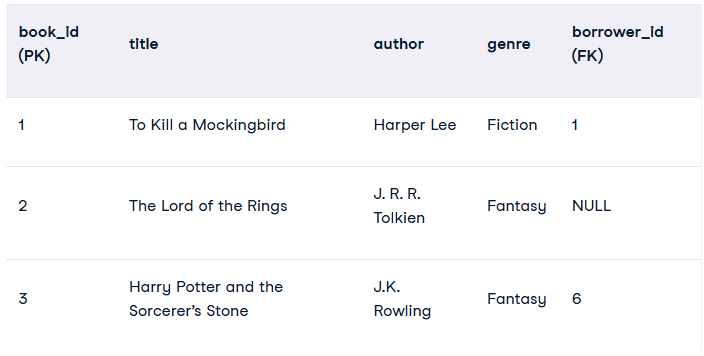

This might look like a solution, but it **violates** 2NF simply because the `borrower_id` only partially depends on the `book_id`. 
* **A book can have multiple borrowers, but a single `borrower_id` can only be linked to one book in this structure.**
* This creates a **partial dependency**.

**Solution**

We need to achieve the **many-to-many relationship between books and borrowers** to achieve 2NF. This can be done by introducing a separate table:

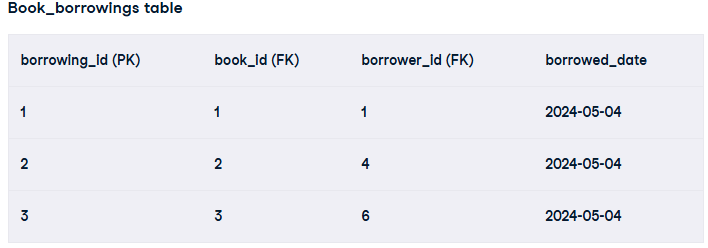

This table establishes a clear relationship between books and borrowers. 
* The `book_id` and `borrower_id` act as **foreign keys**, referencing the primary keys in their respective tables.
* This approach ensures that `borrower_id` **depends on the entire primary key (`book_id`)** of the books table, complying with 2NF.



## Third Normal Form (3NF)

**3NF builds on 2NF by eliminating transitive dependencies.** 
* A transitive dependency occurs when a non-key attribute depends on another non-key attribute, which in turn depends on the primary key.
* It basically takes its meaning from the transitive law.

From the 2NF we already implemented, there are three tables in our library database:

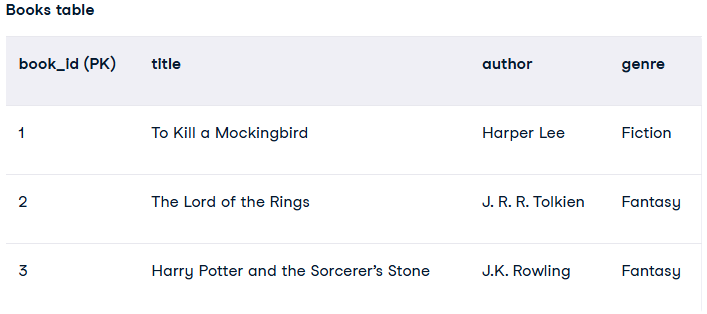

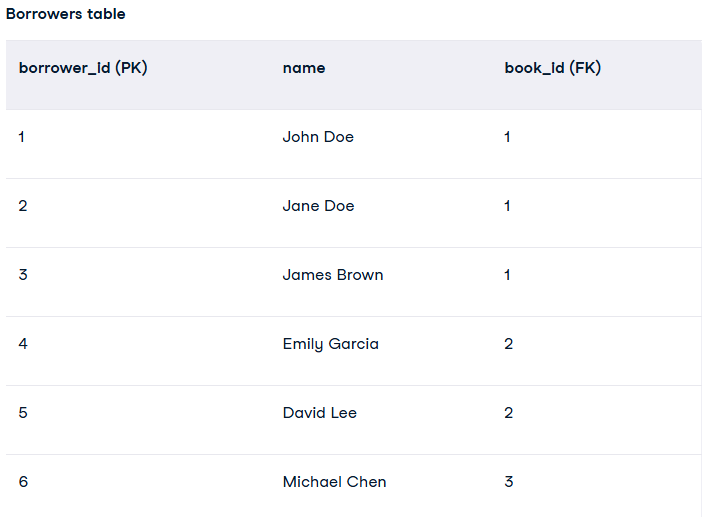

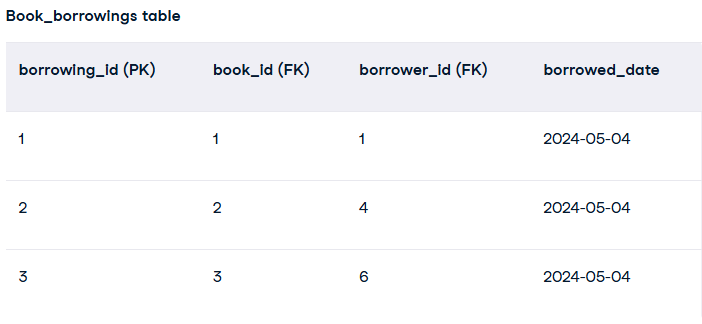

The 2NF structure looks efficient, but there might be a hidden dependency. Imagine we add a `due_date` column to the books table. This might seem logical at first sight, but it’s going to create a transitive dependency where:
* The `due_date` column depends on the `borrowing_id (a non-key attribute) from the book_borrowings table.
* The borrowing_id in turn depends on book_id (the primary key) of the books table.
The implication of this is that due_date relies on an intermediate non-key attribute (borrowing_id) instead of directly depending on the primary key (book_id). This violates 3NF.


